In [ ]:
# !pip install -q git+https://github.com/RobertJaro/NF2.git
# !wget https://hinode.isee.nagoya-u.ac.jp/nlfff_database/v12/11158/20110213/11158_20110213_120000.nc

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import warnings
warnings.filterwarnings("ignore")

from nf2.evaluation.unpack import load_cube

from utils.data_load import load_nc
from utils.metric import evaluate
from utils.plotting import plot_overview, plot_sample
from utils.validation import valid

In [ ]:
b_true = load_nc('11158_20110213_120000.nc')

In [ ]:
b = load_cube('pinn/extrapolation_result.nf2', progress=True)

100%|██████████| 33884/33884 [00:40<00:00, 837.18it/s] 


In [ ]:
evaluate(b, b_true)

{'c_vec': 0.6727314226754638,
 'c_vec_2': 0.6727314226754638,
 'c_cs': nan,
 'c_cs_2': -0.12548385836989423,
 'c_cs_2_ep': -0.12548385826743758,
 'E_n': 2.6963902769106802,
 'E_n_2': 2.6963902769106802,
 'E_m': inf,
 'E_m_2': 12.040995241170798,
 'E_m_ep': 2258164.446854708,
 'eps': 1.6194274980791146,
 'sig_J': 14.605847249161236,
 'sig_J_ll': nan,
 'L1': 0.14437586,
 'L2': 0.070558615,
 'L1_B': nan,
 'L2_B': 10.718387826633455,
 'L2n': 0.1578395487740636,
 'L2n_B': 129488124.65404812,
 'relative_l2': 0.952488359457434,
 'mse': 751.9913156612926}

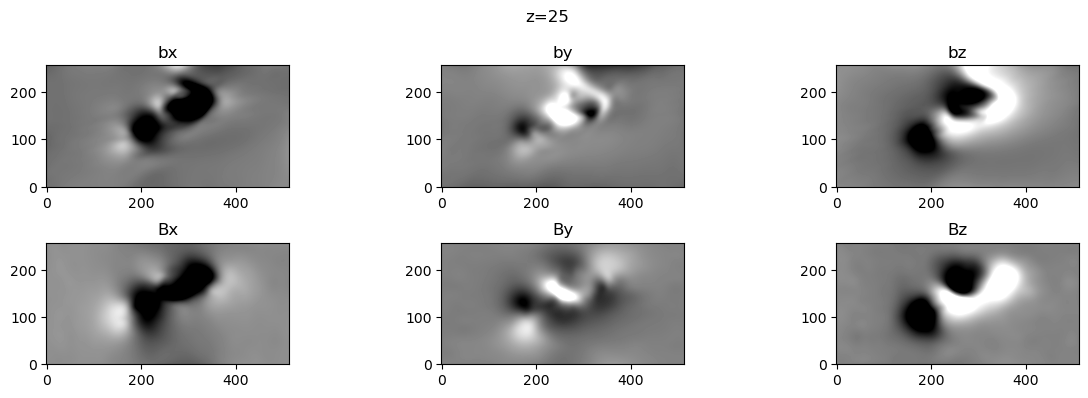

In [ ]:
plot_overview(b, b_true, z=25, b_norm=100)

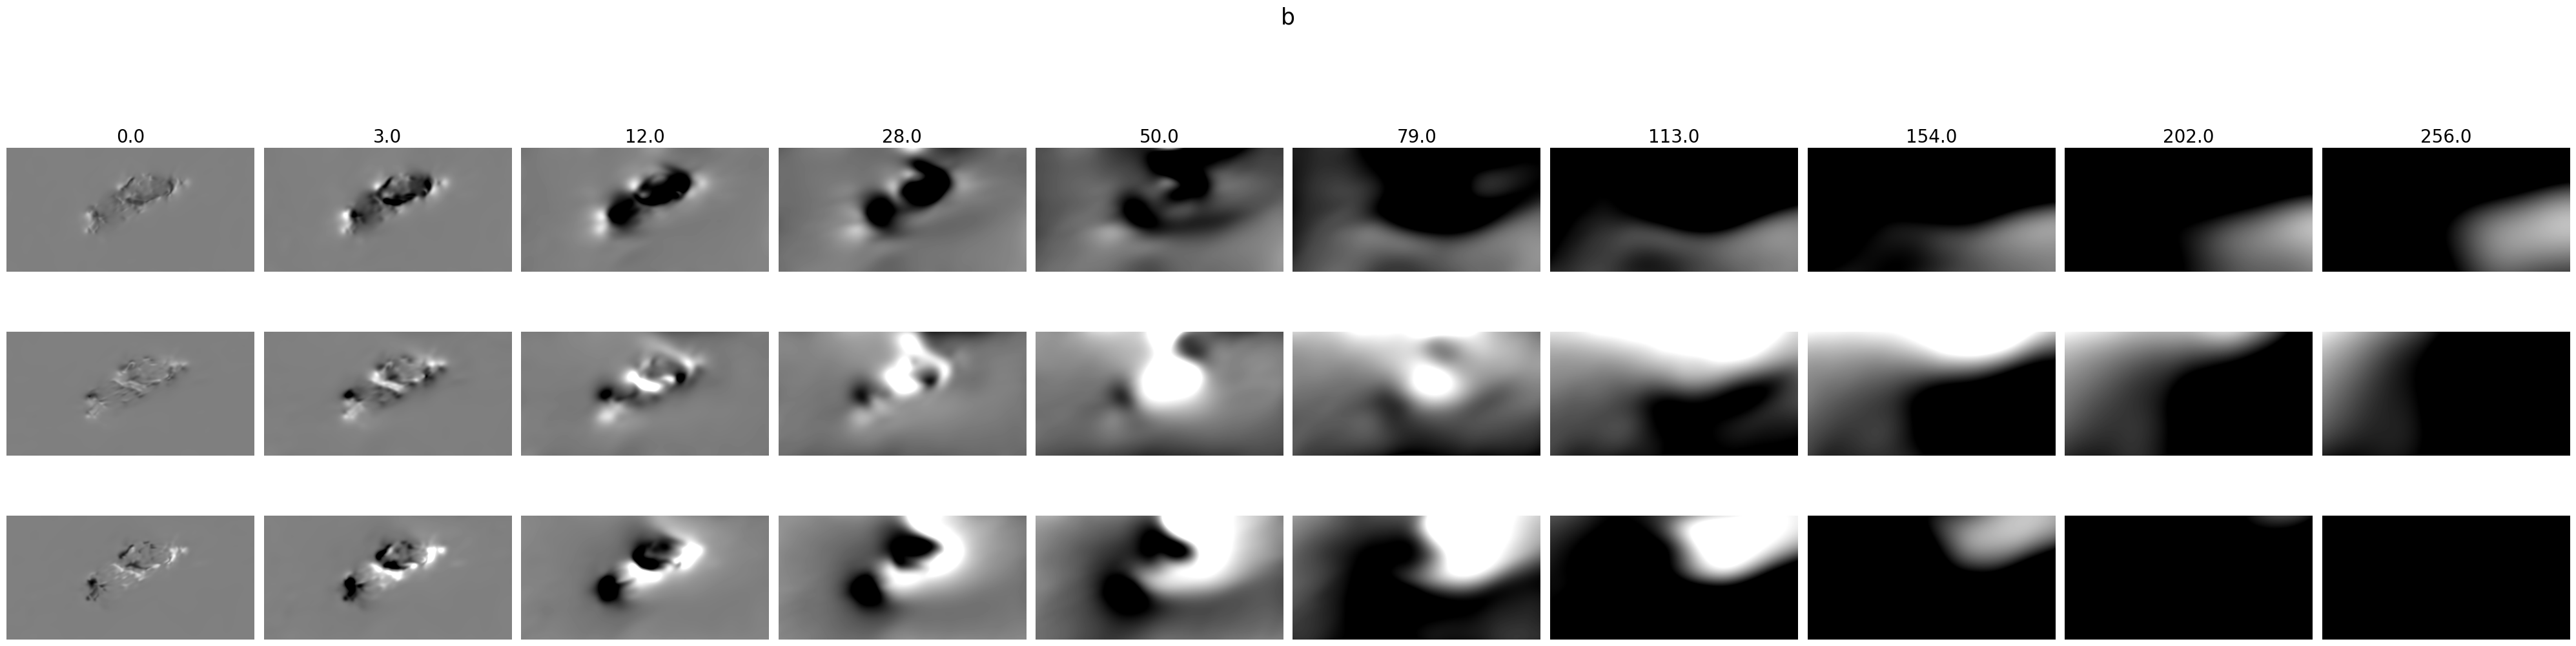

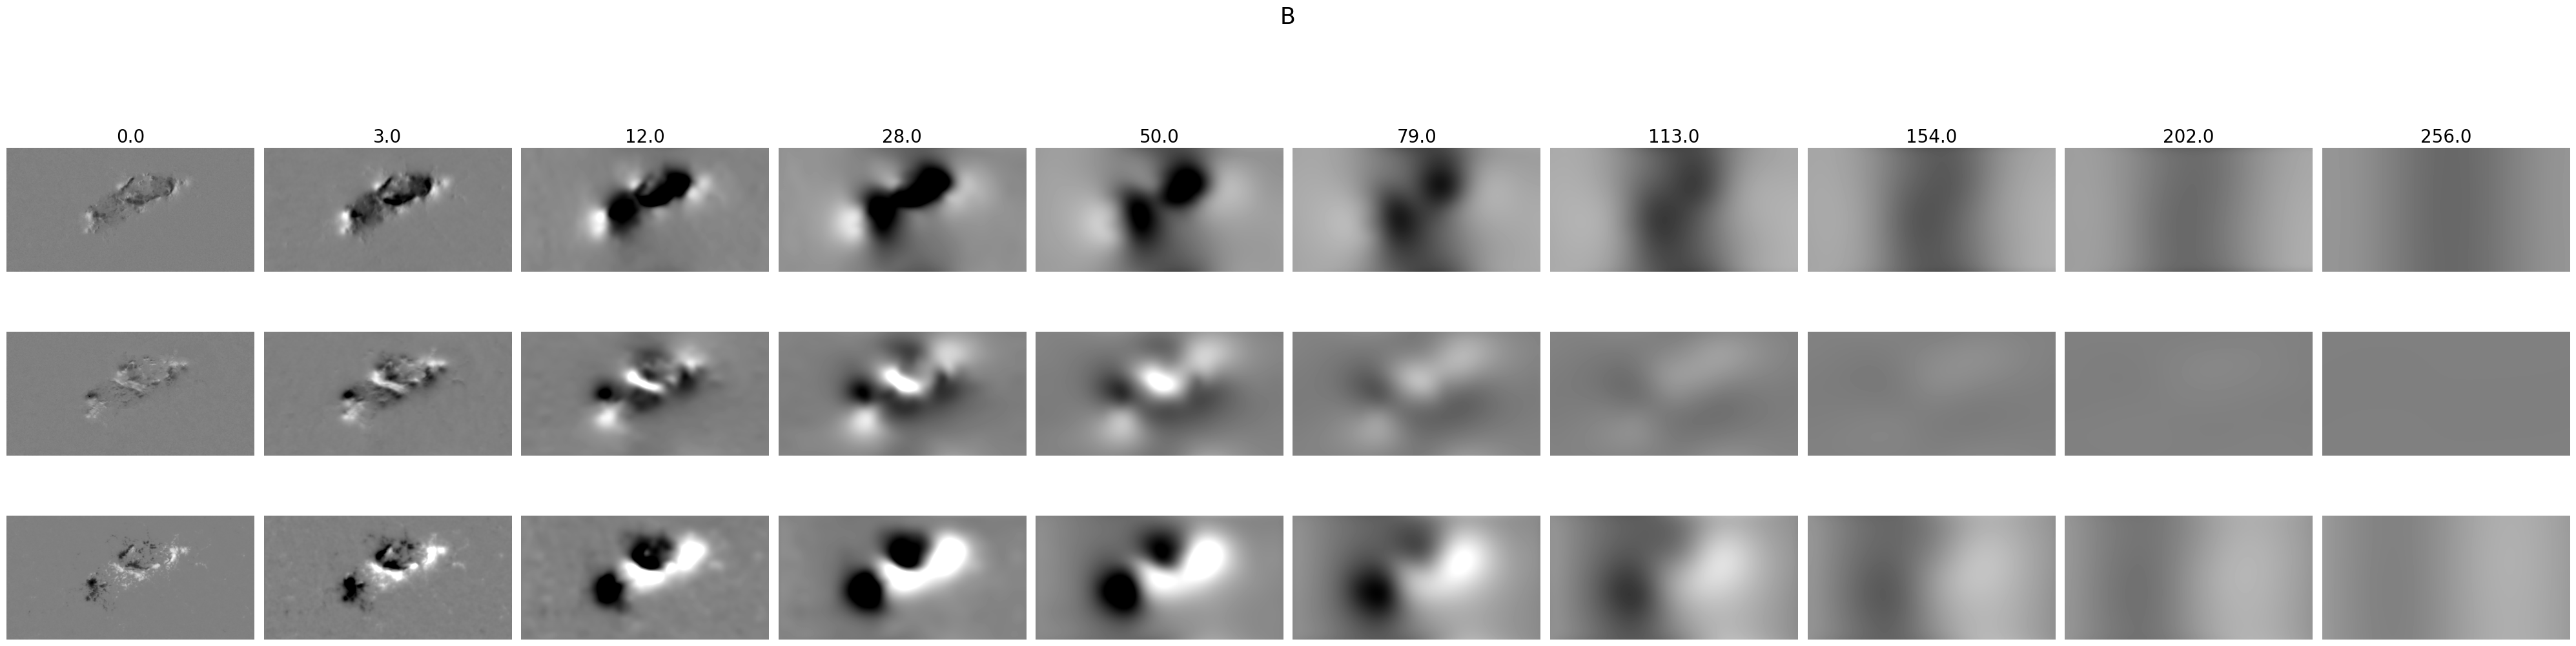

In [ ]:
plot_sample(b, b_true)

sig_J * 1e2: 14.6058; Lf: 0.1444; Ld: 0.0706
DIVERGENCE [1/pix]: 0.0016; THETA [deg] 8.3986
DIVERGENCE [1/pix]: 0.0016; THETA [deg] 8.3986


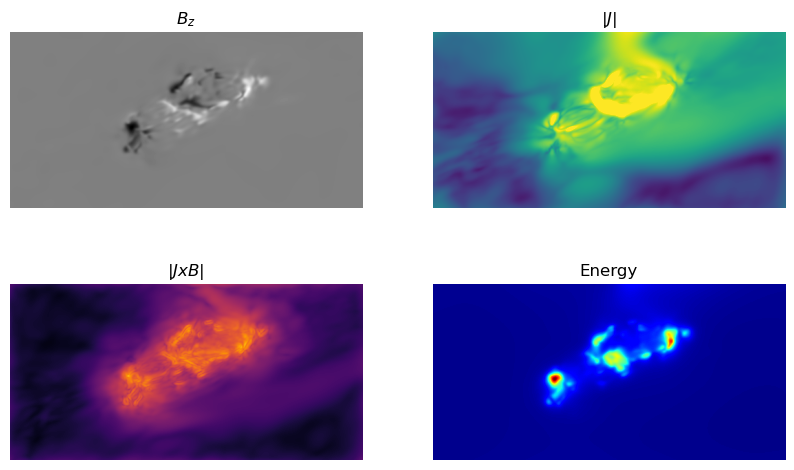

In [ ]:
valid(b)

sig_J * 1e2: 72.0747; Lf: 57.5472; Ld: 10.7184
DIVERGENCE [1/pix]: 129488.1276; THETA [deg] nan
DIVERGENCE [1/pix]: 0.0033; THETA [deg] 46.1162


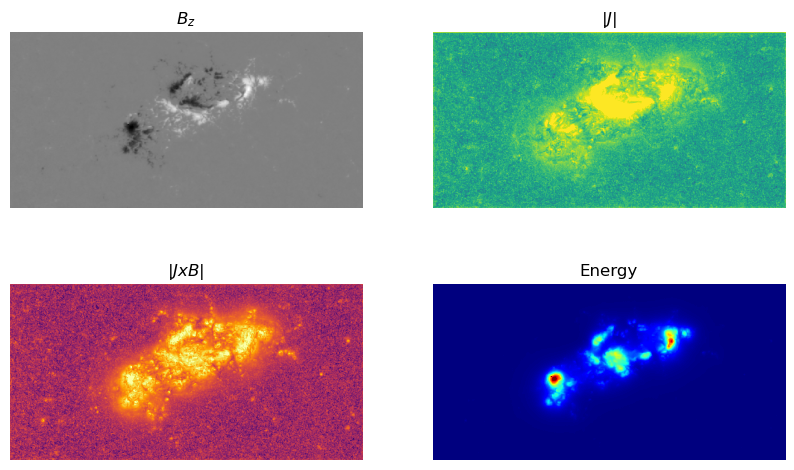

In [ ]:
valid(b_true)

In [ ]:
import pyvista as pv
pv.set_jupyter_backend('static')

In [ ]:
from utils.mag_plotting import create_mesh, mag_plotter

bx = b[..., 0]
by = b[..., 1]
bz = b[..., 2]

mesh = create_mesh(bx, by, bz)

b_plot = mag_plotter(mesh)

vmin = -2500
vmax = 2500
i_siz = 160
j_siz = 100
i_res = 16
j_res = 16

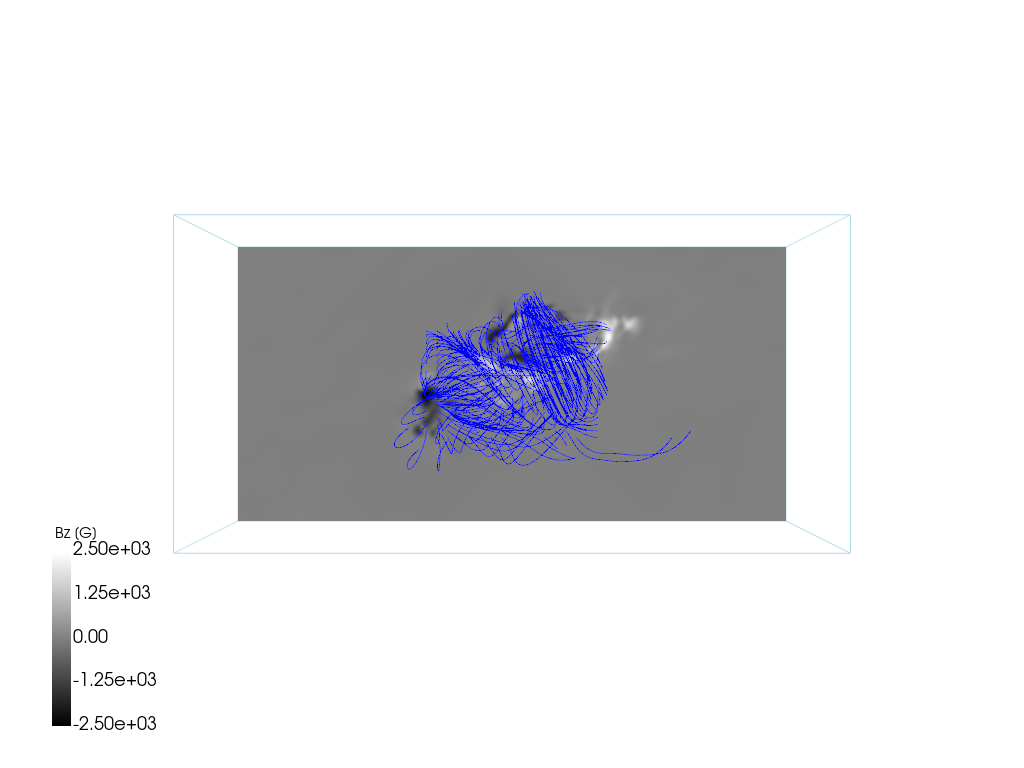

In [ ]:
b_plot.pv_streamline_Bz(camera_position='xy', i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax);

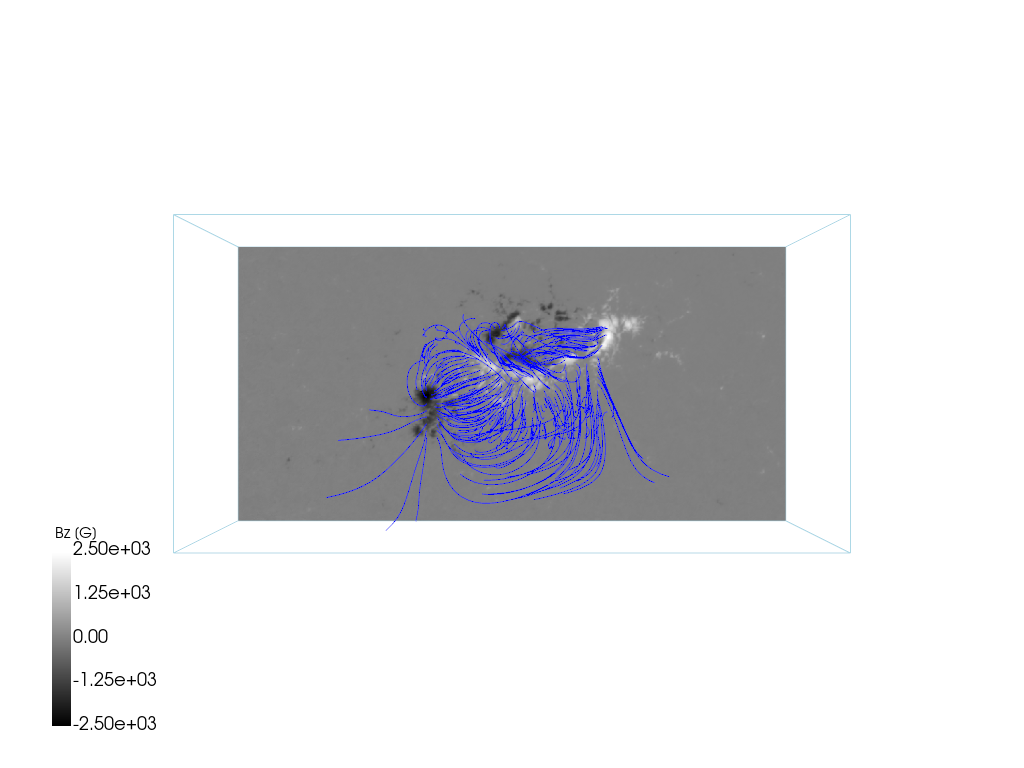

In [ ]:
b_true_x = b_true[..., 0]
b_true_y = b_true[..., 1]
b_true_z = b_true[..., 2]

b_true_mesh = create_mesh(b_true_x, b_true_y, b_true_z)

b_true_plot = mag_plotter(b_true_mesh)

b_true_plot.pv_streamline_Bz(camera_position='xy', i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax);